In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [4]:
print(df.tail())

         Values
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000


# Using Scatter Plot

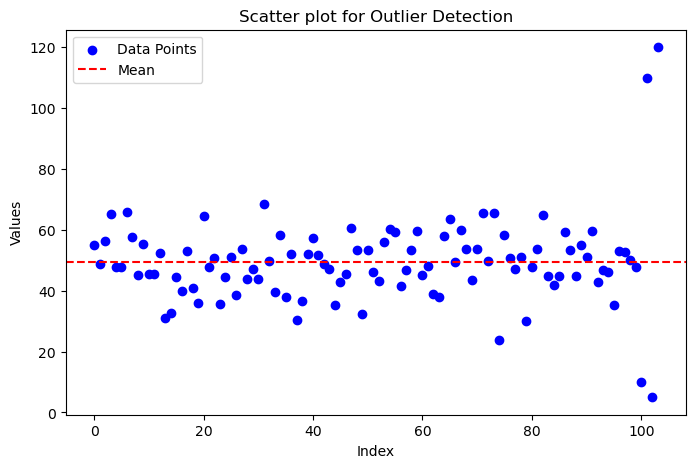

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data Points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for Outlier Detection")
plt.legend()
plt.show()

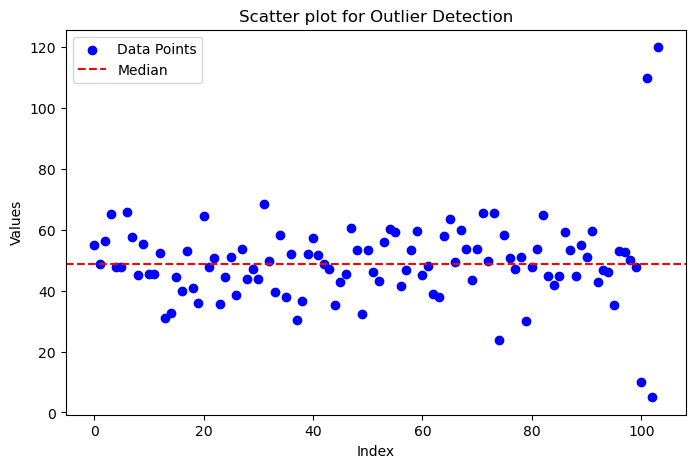

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data Points')
plt.axhline(y=df['Values'].median(),color='red',linestyle='--',label='Median')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for Outlier Detection")
plt.legend()
plt.show()

# Box Plot

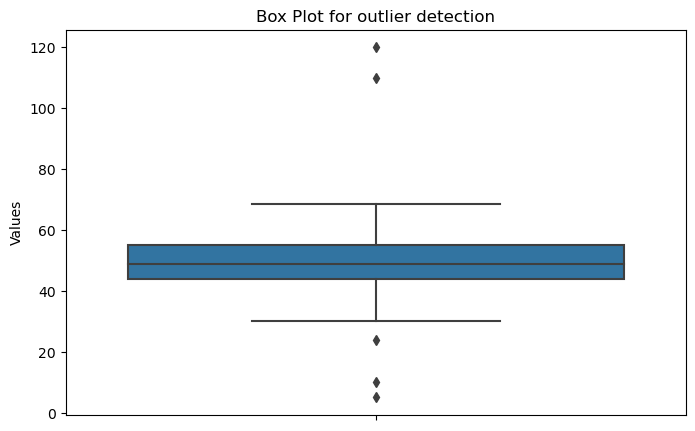

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box Plot for outlier detection")
plt.show()

# Z-Score

the z-Score formula is: 
 $z=x-\mu /\sigma $

In [27]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score outlier_z Outlier_Z
101   110.0  4.328173   Outlier   Outlier
102     5.0 -3.175368   Outlier   Outlier
103   120.0  5.042796   Outlier   Outlier


# Inter Quantile Range IQR 

The formula for IQR is 
$$IQR= Q3 - Q1$$
$$lower bound= Q1-1.5*IQR$$
$$upper bound= Q3+1.5*IQR$$

In [29]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if(x<lower_bound or x>upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

         Values   Z-score outlier_z Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal    Normal     Outlier
100   10.000000 -2.818056    Normal    Normal     Outlier
101  110.000000  4.328173   Outlier   Outlier     Outlier
102    5.000000 -3.175368   Outlier   Outlier     Outlier
103  120.000000  5.042796   Outlier   Outlier     Outlier


## Finding Outliers Using the IQR Method with a 5-Number Summary 

the 5-number summary consists of 

* Minimum(Q0)- the smallest value in the dataset.

* First Quartile(Q1)- the 25th percentile(lower).

* Median(Q2)- the 50th percentile(middle value).

* Third Quartile (Q3) → The 75th percentile (upper quartile).

* Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
$$IQR=Q3−Q1$$
 
Any value outside the range:
 
$$[Q1−1.5×IQR,Q3+1.5×IQR]$$  is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [34]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=data[(data<lower_bound) | (data>upper_bound)]

print(f"5-Number Summary\n: {min_value}, Q1:{Q1}, Median (Q2): {Q2}, Max:{max_value}")
print(f"IQR : {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")

5-Number Summary
: 5.0, Q1:43.874401021766715, Median (Q2): 48.73043708220287, Max:120.0
IQR : 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]
